# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The Molecular Dynamics (MD) code starts the simulation run from a provided spatial configuration of the $N$ particles (file: <font face="Courier">config.0</font>) and, once the simulation is finished, it writes out the final configuration (file: <font face="Courier">config.final</font>). 
1. <span style="color:red">Improve the MD code by enabling (you should insert this option via a boolean-like variable in the input file) the **possibility** to **(re)start** reading not only a **actual** spatial configuration [$\vec{r}(t)$] file but also an **old** spatial configuration [$\vec{r}(t-dt)$] file</span> (files: <font face="Courier">old.0</font> and <font face="Courier">old.final</font>).
2. Moreover, <span style="color:red">add the possibility to rescale the velocities [i.e. to correct $\vec{r}(t-dt)$] in order to match a desired temperature</span>.
3. In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

The typical required operations when the re-start option will be enabled are:
1. read $\vec{r}(t)$ and $\vec{r}(t-dt)$ from the corresponding input files
2. compute $\vec{r}(t+dt)$ with one step of the Verlet algorithm; with $\vec{r}(t+dt)$ and $\vec{r}(t)$ compute $\vec{v}(t+dt/2)$; finally obtain the actual temperature $T(t+dt/2)$
3. by comparing $T(t+dt/2)$ with the desired/target temperature  $T^\star$ extract a scaling factor for the velocities and rescale them: $\vec{v}(t) \to \vec{v}_s(t)$
4. use $\vec{v}_s(t)$ to estimate a novel **old** spatial configuration: $\vec{r}_{new}(t) = \vec{r}(t+dt) - dt \vec{v}_s$
5. use $\vec{r}_{new}(t)$ and $\vec{r}(t+dt)$ to start the simulation
6. Do not forget to use **periodic boundary contitions** every time it is appropriate!

This will help you, especially in the equilibration phases of your simulations.

## <span style="color:fuchsia">  Exercise 04.1</span>

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.stats import norm , cauchy
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit

In [52]:
# SI units

k_b = 1.380649 * 10**(-23)  #(J/K)
epsilon = 120 * k_b         #(joule)
sigma = 0.34 * 10**(-9)     #(m)
m = 6.634 * 10**(-26)       #(kg)

In [53]:
# read data

temp = np.genfromtxt("MolecularDynamics_NVE/equilibration/solid/output_temp.dat", dtype='float', delimiter=',')
e_kin = np.genfromtxt("MolecularDynamics_NVE/equilibration/solid/output_ekin.dat", dtype='float', delimiter=',')
e_pot = np.genfromtxt("MolecularDynamics_NVE/equilibration/solid/output_epot.dat", dtype='float', delimiter=',')
e_tot = np.genfromtxt("MolecularDynamics_NVE/equilibration/solid/output_etot.dat", dtype='float', delimiter=',')

# SI units
temp *= 120
e_kin *= epsilon 
e_pot *= epsilon
e_tot *= epsilon

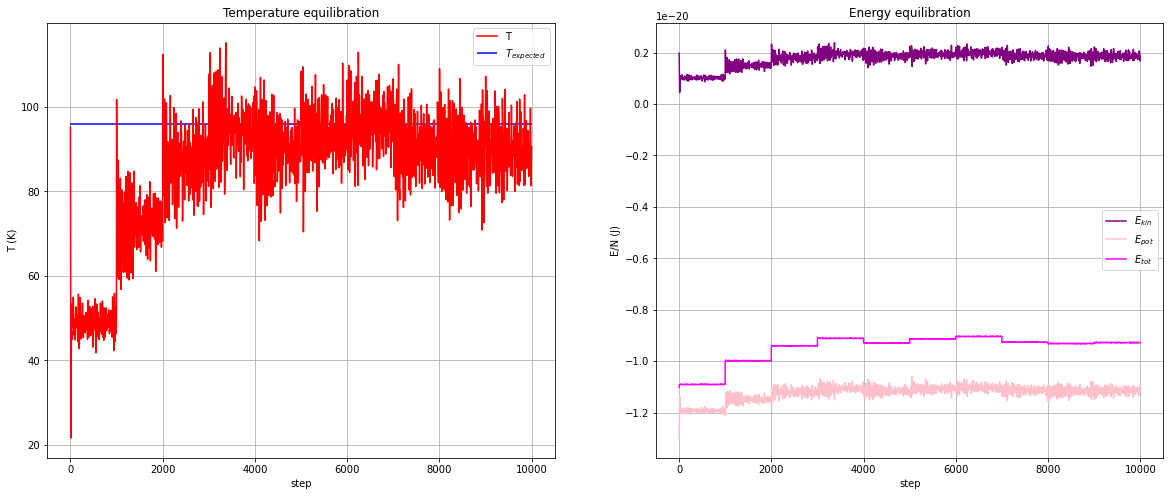

In [54]:
# plot data

fig, axx = plt.subplots(1,2, figsize=(20,8))

# temperature
ax = axx[0]
ax.plot(np.arange(len(temp)), temp, color="red", label = "T")
ax.hlines(0.8*120, 0, len(temp), color = "blue", label =r"$T_{expected}$")
ax.set_title('Temperature equilibration')
ax.set_xlabel('step')
ax.set_ylabel('T (K)')
ax.grid(True)
ax.legend()

# energy
ax = axx[1]
ax.plot(np.arange(len(e_kin)), e_kin, color="purple", label = r"$E_{kin}$")
ax.plot(np.arange(len(e_kin)), e_pot, color="pink", label = r"$E_{pot}$")
ax.plot(np.arange(len(e_kin)), e_tot, color="fuchsia", label = r"$E_{tot}$")
ax.set_title('Energy equilibration')
ax.set_xlabel('step')
ax.set_ylabel('E/N (J)')
ax.grid(True)
ax.legend()

<span style="color:purple"> 
These plots shows the equilibration of a solid model of Argon of 108 particles. 
    
The data come from 10 different simulations of the system, each run after 10000 time steps (only 1000 were printed) and starting from the last printed configuration of the execution before. The measured steps of Verlet's algorithm were kept only 1 every 10 to avoid an eccessive correlation.
    
It is clear that the NVE Verlet algorithm is not accurate on the temperature used if it is not equilibrated. We see that in the first equilibration "groups" (1000 printed steps) the temperature and the energy reach a stabilization, but to a value that is not what one would expect. That is why more runs of the algorithm are necessary to equilibrate the system before the actual measure.
    
As the number of restarts grows, the system reaches a global stabilization and that is when a measure is possible. After that point (4 or 5 runs) the energy remains almost constant and the temperature fluctuates around the expected value.


### Exercise 04.2

The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <span style="color:blue"><font face="Courier">nstep</font></span> of the simulation into <span style="color:blue"><font face="Courier">nblocks</font></span>. By exploiting these blocks, <span style="color:red">code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font></span>

### Exercise 04.3

By means of your upgraded MD code, equilibrate and <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ ... in SI units!

## <span style="color:fuchsia">  Exercise 04.3</span>

## <span style="color:fuchsia"> Solid Argon </span>

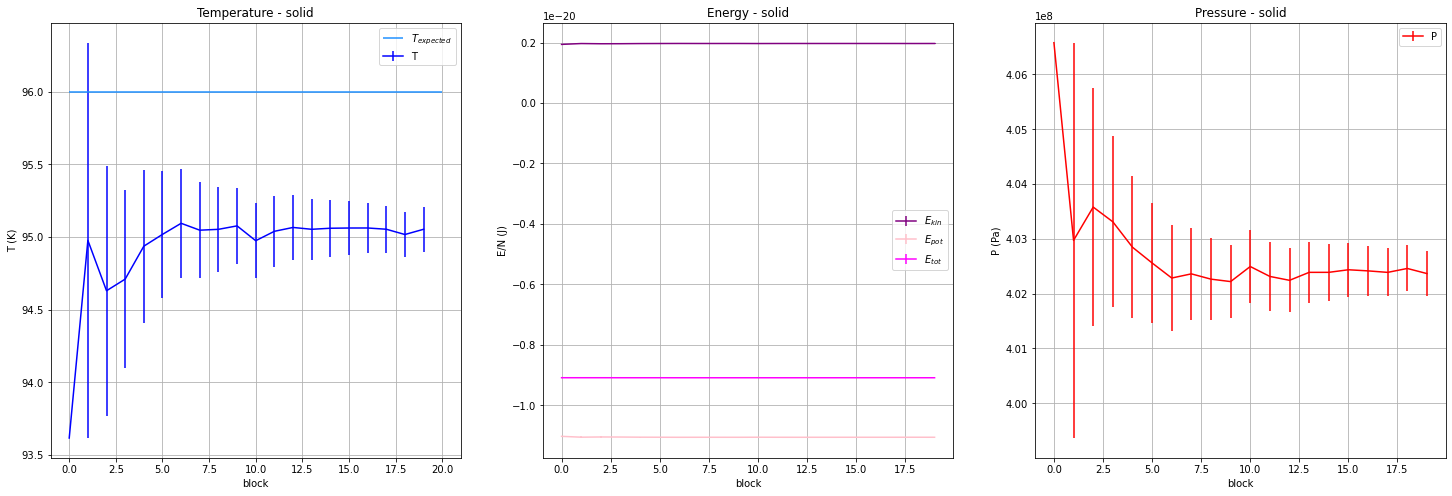

In [46]:
# read data

temp, err_temp = np.genfromtxt("MolecularDynamics_NVE/solid/ave_temp.dat", dtype='float', delimiter=',', unpack=True)
e_kin, err_e_kin = np.genfromtxt("MolecularDynamics_NVE/solid/ave_ekin.dat", dtype='float', delimiter=',', unpack=True)
e_pot, err_e_pot = np.genfromtxt("MolecularDynamics_NVE/solid/ave_epot.dat", dtype='float', delimiter=',', unpack=True)
e_tot, err_e_tot = np.genfromtxt("MolecularDynamics_NVE/solid/ave_etot.dat", dtype='float', delimiter=',', unpack=True)
p, err_p = np.genfromtxt("MolecularDynamics_NVE/solid/ave_press.dat", dtype='float', delimiter=',', unpack=True)

# SI units
temp *= 120
err_temp *= 120 
e_kin *= epsilon 
err_e_kin *= epsilon
e_pot *= epsilon
err_e_pot *= epsilon
e_tot *= epsilon
err_e_tot *= epsilon
p *= epsilon/(sigma**3)
err_p *= epsilon/(sigma**3)


# plot data

fig, axx = plt.subplots(1,3, figsize=(25,8))

# temperature
ax = axx[0]
ax.errorbar(np.arange(len(temp)), y=temp, yerr=err_temp, color="blue", label = "T")
ax.hlines(0.8*120, 0, len(temp), color = "dodgerblue", label =r"$T_{expected}$")
ax.set_title('Temperature - solid')
ax.set_xlabel('block')
ax.set_ylabel('T (K)')
ax.grid(True)
ax.legend()

# energy
ax = axx[1]
ax.errorbar(np.arange(len(e_kin)), e_kin, yerr=err_e_kin, color="purple", label = r"$E_{kin}$")
ax.errorbar(np.arange(len(e_pot)), e_pot, yerr=err_e_pot, color="pink", label = r"$E_{pot}$")
ax.errorbar(np.arange(len(e_tot)), e_tot, yerr=err_e_tot, color="fuchsia", label = r"$E_{tot}$")
ax.set_title('Energy - solid')
ax.set_xlabel('block')
ax.set_ylabel('E/N (J)')
ax.grid(True)
ax.legend()

# pressure
ax = axx[2]
ax.errorbar(np.arange(len(p)), y=p, yerr=err_p, color="red", label = "P")
ax.set_title('Pressure - solid')
ax.set_xlabel('block')
ax.set_ylabel('P (Pa)')
ax.grid(True)
ax.legend()

## <span style="color:fuchsia"> Liquid Argon </span>

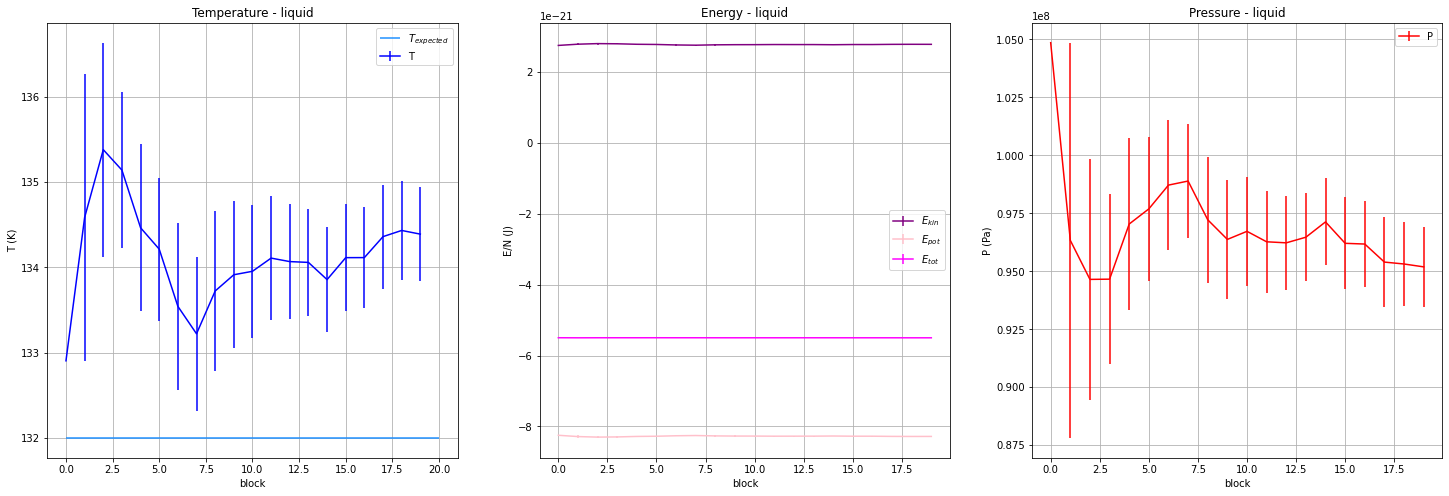

In [49]:
# read data

temp, err_temp = np.genfromtxt("MolecularDynamics_NVE/liquid/ave_temp.dat", dtype='float', delimiter=',', unpack=True)
e_kin, err_e_kin = np.genfromtxt("MolecularDynamics_NVE/liquid/ave_ekin.dat", dtype='float', delimiter=',', unpack=True)
e_pot, err_e_pot = np.genfromtxt("MolecularDynamics_NVE/liquid/ave_epot.dat", dtype='float', delimiter=',', unpack=True)
e_tot, err_e_tot = np.genfromtxt("MolecularDynamics_NVE/liquid/ave_etot.dat", dtype='float', delimiter=',', unpack=True)
p, err_p = np.genfromtxt("MolecularDynamics_NVE/liquid/ave_press.dat", dtype='float', delimiter=',', unpack=True)

# SI units
temp *= 120
err_temp *= 120 
e_kin *= epsilon 
err_e_kin *= epsilon
e_pot *= epsilon
err_e_pot *= epsilon
e_tot *= epsilon
err_e_tot *= epsilon
p *= epsilon/(sigma**3)
err_p *= epsilon/(sigma**3)


# plot data

fig, axx = plt.subplots(1,3, figsize=(25,8))

# temperature
ax = axx[0]
ax.errorbar(np.arange(len(temp)), y=temp, yerr=err_temp, color="blue", label = "T")
ax.hlines(1.1*120, 0, len(temp), color = "dodgerblue", label =r"$T_{expected}$")
ax.set_title('Temperature - liquid')
ax.set_xlabel('block')
ax.set_ylabel('T (K)')
ax.grid(True)
ax.legend()

# energy
ax = axx[1]
ax.errorbar(np.arange(len(e_kin)), e_kin, yerr=err_e_kin, color="purple", label = r"$E_{kin}$")
ax.errorbar(np.arange(len(e_pot)), e_pot, yerr=err_e_pot, color="pink", label = r"$E_{pot}$")
ax.errorbar(np.arange(len(e_tot)), e_tot, yerr=err_e_tot, color="fuchsia", label = r"$E_{tot}$")
ax.set_title('Energy - liquid')
ax.set_xlabel('block')
ax.set_ylabel('E/N (J)')
ax.grid(True)
ax.legend()

# pressure
ax = axx[2]
ax.errorbar(np.arange(len(p)), y=p, yerr=err_p, color="red", label = "P")
ax.set_title('Pressure - liquid')
ax.set_xlabel('block')
ax.set_ylabel('P (Pa)')
ax.grid(True)
ax.legend()

## <span style="color:fuchsia"> Gas Argon </span>

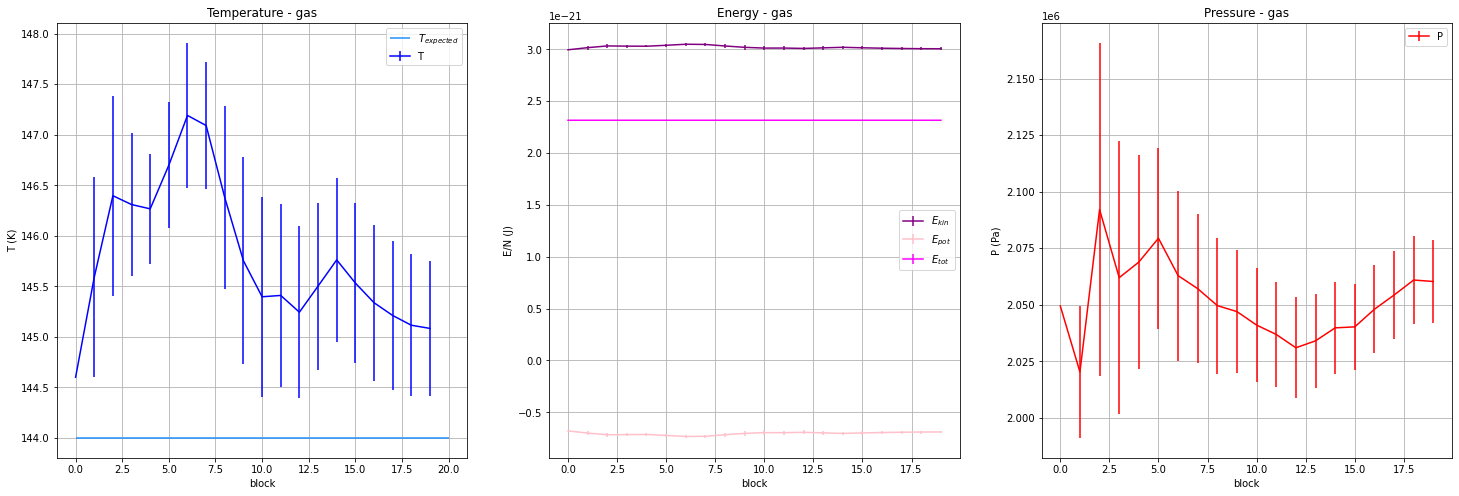

In [50]:
# read data

temp, err_temp = np.genfromtxt("MolecularDynamics_NVE/gas/ave_temp.dat", dtype='float', delimiter=',', unpack=True)
e_kin, err_e_kin = np.genfromtxt("MolecularDynamics_NVE/gas/ave_ekin.dat", dtype='float', delimiter=',', unpack=True)
e_pot, err_e_pot = np.genfromtxt("MolecularDynamics_NVE/gas/ave_epot.dat", dtype='float', delimiter=',', unpack=True)
e_tot, err_e_tot = np.genfromtxt("MolecularDynamics_NVE/gas/ave_etot.dat", dtype='float', delimiter=',', unpack=True)
p, err_p = np.genfromtxt("MolecularDynamics_NVE/gas/ave_press.dat", dtype='float', delimiter=',', unpack=True)

# SI units
temp *= 120
err_temp *= 120 
e_kin *= epsilon 
err_e_kin *= epsilon
e_pot *= epsilon
err_e_pot *= epsilon
e_tot *= epsilon
err_e_tot *= epsilon
p *= epsilon/(sigma**3)
err_p *= epsilon/(sigma**3)


# plot data

fig, axx = plt.subplots(1,3, figsize=(25,8))

# temperature
ax = axx[0]
ax.errorbar(np.arange(len(temp)), y=temp, yerr=err_temp, color="blue", label = "T")
ax.hlines(1.2*120, 0, len(temp), color = "dodgerblue", label =r"$T_{expected}$")
ax.set_title('Temperature - gas')
ax.set_xlabel('block')
ax.set_ylabel('T (K)')
ax.grid(True)
ax.legend()

# energy
ax = axx[1]
ax.errorbar(np.arange(len(e_kin)), e_kin, yerr=err_e_kin, color="purple", label = r"$E_{kin}$")
ax.errorbar(np.arange(len(e_pot)), e_pot, yerr=err_e_pot, color="pink", label = r"$E_{pot}$")
ax.errorbar(np.arange(len(e_tot)), e_tot, yerr=err_e_tot, color="fuchsia", label = r"$E_{tot}$")
ax.set_title('Energy - gas')
ax.set_xlabel('block')
ax.set_ylabel('E/N (J)')
ax.grid(True)
ax.legend()

# pressure
ax = axx[2]
ax.errorbar(np.arange(len(p)), y=p, yerr=err_p, color="red", label = "P")
ax.set_title('Pressure - gas')
ax.set_xlabel('block')
ax.set_ylabel('P (Pa)')
ax.grid(True)
ax.legend()

<span style="color:purple"> 
    
The graphs above show the Verlet NVE simulation of three state of Argon: solid, liquid and gas. Temperature, energies per particle and pressure were plotted as a function of the blocks involved in the blocking average process.
    
We saw in part 1 that the fluctuations of temperature at which the simulation is performed are not negligible.
The systems were equilibrated before the actual measurements like this: 
- 7 restarts after 500 steps each for solid
- 10 restarts after 500 steps each for liquid
- 23 restarts after 500 steps each for gas
On the equilibrated system, a final simulation of 20000 steps, divided in 20 blocks, gave the results printed in the files and plotted above.
    
The solid system required less equilibration beacuse it is a more ordered system, while liquid and gas even more are more "active" systems.
    
Altough the system was thermalized properly before making measurements, the temperature results are not perfectly compatible with the input temperature at which the system was brought with the equilibration process. This shows how Verlet's algorithm struggles in mantaining the temperature around its supposed value, and for longer simulation it drifts away. In fact, the algorithm integrates the equations of motion only approximately and therefore each time steps has a discretization error that spreads through the whole simulation. That is why in the last longer simulation (the measurement one) the temperature drifts away from its original value.
This was clear also looking at the temperature plot in part 1: each equilibration run produced temperatures that span a range of almost 20K and the last runs are less precise than the intermediate ones. This makes me suppose that the algorithm work fine in just a short window of time steps after thermalization.
    
Apart from these stabilization problems, the alogrithm predicts the energies and the pressure appropriately, indeed the total energy stays constant throughout each simualtion.
    
Looking at the plots for the average pressure we see that they represent what we shall expect for the 3 states: P for gas is much smaller than for liquid, which is again smaller than the solid case.
    
Also the potential energy shows a plausible result: the solid state has the larger potential interaction energy, indeed the particles are strongly bound to each other; the gas phase has the smallest potential energy beacuse the particles in a gas tend to interact less. The liquid system is in between.

### <span style="color:purple"> Conversion from Lennard-Jones units to SI units: 

<span style="color:purple">
    
    
- multiply lengths by $\sigma$: $ r = \sigma r^* $
- multiply temperature by $ \frac{\epsilon} { k_{b}} $  : $ T = T^* \frac{\epsilon} { k_{b}} $
- multiply energies by $\epsilon$: $ E = E^* \epsilon $
- multiply time by $  \sqrt ( \frac {m \sigma^2}{ \epsilon} ) $

For the simulated Argon system:
- $\sigma = 0.34 nm$
- $ \frac{\epsilon} { k_{b}} = 120 K$
- $ m = 39,948 u$ 

### <span style="color:green"> Optional exercise</span>

Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: istantaneous values, average values and uncertainties.

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$